In [1]:
import csv
import os
import pandas as pd
import re
import nltk
import jsonlines
import json
import numpy as np
import hdbscan
from pprint import pprint
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime as dt, timedelta as td
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



In [2]:
#f = open ('news_text_embedding.json', "r")
f_text = open('news_text_embedding.json',"r")
news_text_embedding = json.load(f_text)

In [3]:
print(len(news_text_embedding))

4892


In [4]:
news_articles = pd.read_csv('articles_dec21_cities.csv')

print(len(news_articles),len(news_text_embedding))

4892 4892


In [5]:
all_embedding = []
for index, row in news_articles.iterrows():
    all_embedding.append(news_text_embedding[index]['embedding'])


In [6]:
df_cities = news_articles
df_cities['embedding'] = all_embedding

In [7]:
df_cities.head()

,Unnamed: 0,date,url,title,text,summary,keywords,city,embedding
0,0,2021-02-01,http://timesofindia.indiatimes.com//city/delhi...,"At 3, Delhi's Covid toll lowest in 9 months",NEW DELHI: The capital reported three deaths f...,NEW DELHI: The capital reported three deaths f...,"['covid', 'cases', 'city', 'deaths', 'tweeted'...",delhi,"[-0.5708387494087219, 0.19121389091014862, -0...."
1,1,2021-02-01,http://timesofindia.indiatimes.com//business/i...,Budget for biotech sector: A Covid ‘blessing’?...,NEW DELHI: After years of being ignored by suc...,"Agreeing, Serum Institute of India CEO Adar Po...","['gets', 'covid', 'blessing', 'india', 'indust...",business,"[-0.2911737859249115, 0.6275010108947754, 0.02..."
2,2,2021-02-01,http://timesofindia.indiatimes.com//india/42-t...,42 trainee Gujarat cops report side-effects af...,AHMEDABAD/ SURAT/ VADODARA: A total of 42 wome...,AHMEDABAD/ SURAT/ VADODARA: A total of 42 wome...,"['surat', 'sideeffects', 'vadodara', 'symptoms...",india,"[0.04958006739616394, 0.6071274876594543, -0.5..."
3,3,2021-02-01,http://timesofindia.indiatimes.com//world/rest...,Oxford Covid vaccine trials: Oxford kept Covid...,"LONDON: About 1,500 of the initial volunteers ...",The ethicists all said it indicates the resear...,"['volunteers', 'dose', 'participants', 'clinic...",world,"[-0.5367163419723511, 0.734610378742218, -0.38..."
4,4,2021-02-01,http://timesofindia.indiatimes.com//city/patna...,Only 75 fresh Covid-19 cases registered in Bihar,PATNA: The number of new Covid-19 cases remain...,PATNA: The number of new Covid-19 cases remain...,"['75', 'districts', 'registered', 'cases', 're...",patna,"[-0.2868908941745758, 0.314645916223526, -0.31..."


In [8]:
CITY = "patna"
embed = np.array(df_cities.loc[((df_cities['city'] == CITY) & (df_cities['date'] > '2021-04-10'))]['embedding'].tolist())
text = df_cities.loc[((df_cities['city'] == CITY) & (df_cities['date'] > '2021-04-10'))]['text']
summary = df_cities.loc[((df_cities['city'] == CITY) & (df_cities['date'] > '2021-04-10'))]['summary']
date = df_cities.loc[((df_cities['city'] == CITY) & (df_cities['date'] > '2021-04-10'))]['date']

keywords = df_cities.loc[((df_cities['city'] == CITY) & (df_cities['date'] > '2021-04-10'))]['keywords']

In [9]:
print(len(embed),len(text),len(summary))

254 254 254


In [10]:
from sklearn.cluster import KMeans, MeanShift, Birch, AffinityPropagation
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

For n_clusters = 20, silhouette score is 0.058306659865491196, error is 11014.204706134557)
For n_clusters = 22, silhouette score is 0.054853342751712074, error is 10900.205821865666)
For n_clusters = 24, silhouette score is 0.06517071239951906, error is 10567.339829491018)
For n_clusters = 26, silhouette score is 0.05513820308773094, error is 10392.529187717473)
For n_clusters = 28, silhouette score is 0.055646683772630094, error is 10133.606281639675)
For n_clusters = 30, silhouette score is 0.059298690342085014, error is 9847.56205944544)
For n_clusters = 32, silhouette score is 0.05456696674373567, error is 9765.328006397418)
For n_clusters = 34, silhouette score is 0.05429094741709287, error is 9627.544438647923)
For n_clusters = 36, silhouette score is 0.05954681284617977, error is 9459.580914356791)
For n_clusters = 38, silhouette score is 0.059379154388718144, error is 9215.403078789965)
For n_clusters = 40, silhouette score is 0.05402837536849692, error is 9151.040090201215)
F

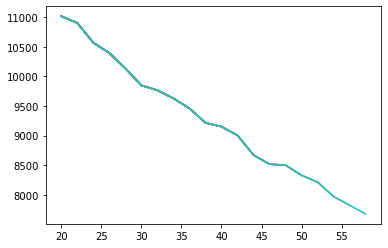

In [11]:
cluster = []
sse = []
for clusterCnt in np.arange(20,60,2):
    k_means = KMeans(n_clusters=clusterCnt).fit(np.array(embed))
    labels = k_means.labels_
    err = k_means.inertia_
    cluster.append(clusterCnt)
    sse.append(err)
    score = silhouette_score(embed, labels)
    print("For n_clusters = {}, silhouette score is {}, error is {})".format(clusterCnt, score,err))
    plt.plot(cluster,sse)
kn = KneeLocator(cluster, sse, curve='convex', direction='decreasing')
print(kn.knee)

In [12]:
k_means = KMeans(n_clusters=44).fit(np.array(embed))
labels = k_means.labels_
err = k_means.inertia_


In [13]:
print(len(date),len(labels),len(embed),len(text),len(summary))
print(embed.shape)

254 254 254 254 254
(254, 768)


In [19]:
df = pd.DataFrame({'date':date.tolist(),'news':text.tolist(),'summary':summary.tolist(),'embedding':embed.tolist(),'keywords':keywords})


df['labels'] = labels





In [20]:
df.to_pickle("News_patna_labelled")

In [6]:
df = pd.read_pickle("News_delhi_labelled")

In [54]:
amd_df = pd.read_pickle("News_ahmedabad_labelled")

In [16]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from tqdm import tqdm
from wordcloud import WordCloud
from scipy.spatial.distance import cdist
from numpy import dot
from numpy.linalg import norm

In [17]:
for i in range(44):
    print(i,len(df.loc[df['labels'] == i]))

KeyError: 'labels'

In [39]:
news_all =  np.array(df['news'].tolist())
for row in news_all:
    txt = preprocessText(row)
    if "plasma" in txt:
        print(row)

HYDERABAD: With social media full of people crying for help, few individuals from the city have developed dashboards that provide verified information on availability of Covid-19 resources such as beds, oxygen cylinders, plasma, food services for those in isolation, medicines etc.Steep spike in Covid-19 cases has led to an acute shortage of oxygen and ventilator beds, medicines such as Remedisivir and Tocilizumab, among others. Information on the dashboard developed by the state government is limited to hospital beds. As kin of Covid patients frantically searched for help on social media, few netizens went beyond just hospital beds.Vensy Krishna, a 25-year-old lawyer currently working in tech and education along with her friend Medha K, an education and social work consultant, launched an app titled ‘Hyd Covid Resources’. The app provides verified information on availability of oxygen, Remdesivir , ambulance, plasma, blood banks, meal services and other services including mental health

### Top Sentences for every Cluster 

In [23]:
CLUSTER = 0#44
embed_cluster = np.array(df.loc[df['labels'] == CLUSTER]['embedding'].tolist())
text = np.array(df.loc[df['labels'] == CLUSTER]['summary'])

cl = np.reshape(np.mean(embed_cluster,axis=0),(1,768))
sscore = (1-cdist(cl,embed_cluster,metric='cosine'))*(-1)
top_2_idx = np.argsort(sscore[0])

top_2_values = [(text[i],sscore[0][i]) for i in top_2_idx]
pprint(top_2_values)
print(len(text))
#df.loc[df['labels'] == CLUSTER]['date'].explode().value_counts()


[('PATNA: Covid-19 cases continued to show a downward trend with 2,603 new '
  'ones registered on Wednesday, and in the same period, 6,641 people had '
  'recovered.\n'
  'Officially, 99 deaths were reported, taking the toll to 4,846.\n'
  'One black fungus death was reported at IGIMS.The new cases reported by the '
  'health department are against 1,31,916 samples tested with a positivity '
  'rate of 1.97%.\n'
  'The overall caseload has reached 6,98,329, but with 6,62,491 recoveries, '
  'there are now 30,992 active cases in Bihar The IGIMS reported nine deaths '
  'of Covid-19 patients undergoing treatment there, apart from the death of a '
  'person with mucormycosis.\n'
  'Here, 15 patients got admitted, 14 discharged, and there were 193 patients '
  'in the hospital.',
  -0.9597357068252863),
 ('Representative imagePATNA: The Covid-19 tally in Bihar hit the seven lakh '
  'mark on Thursday with the state registering 2,568 more cases, taking the '
  'caseload to 7,00897.\n'
  'O

100%|█████████████████████████████████████| 552/552 [00:00<00:00, 869416.38it/s]


310


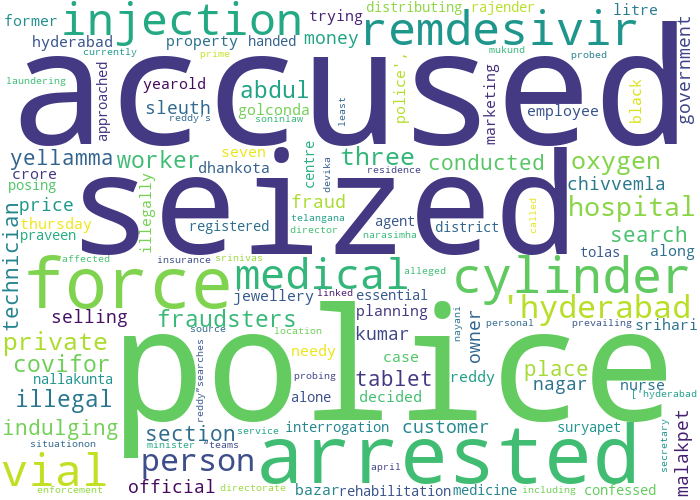

In [35]:
STOPWORDS = nltk.corpus.stopwords.words('english')

STOPWORDS.append("covid")
STOPWORDS.append("india")
STOPWORDS.append("corona")
STOPWORDS.append("coronavirus")
STOPWORDS.append("covid19")
STOPWORDS.append("covid19india")
STOPWORDS.append("pandemic")
STOPWORDS.append("virus")
STOPWORDS.append("world")
STOPWORDS.append("state")
STOPWORDS.append("vaccine")
STOPWORDS.append("vaccination")

lemmatizer = WordNetLemmatizer()
def preprocessText(text, remove_less_than=5):
    txt = re.sub('@[A-Za-z0-9]+','',text)
    #remove links
    txt = re.sub('https://t.co/[A-Za-z0-9]+', '', txt)
    #remove hashtags
    txt = re.sub('#[A-Za-z0-9]+', '', txt) 
    #remove punctuation
    txt = re.sub('[,\.!-?]', '', txt)
    #remove numbers
    txt = re.sub('([0-9]+)', '', txt)
    txt = txt.lower()
            
    text = ' '.join([lemmatizer.lemmatize(word).strip() for word in txt.split() if len(word)>=remove_less_than and word not in STOPWORDS]) # removing stems, short words and stop words
    return text
cleaned_text = df.loc[df['labels'] == CLUSTER]['news'].apply(preprocessText)
# pd.set_option("display.max_rows", len(cleaned_text))
# vectorizer = TfidfVectorizer(max_features=100)
# vect = vectorizer.fit_transform(cleaned_text)
#print(df.loc[df['labels'] == CLUSTER]['tweets'])
#print(vectorizer.get_feature_names())
wordfreq = dict()
wordlist = str(list(cleaned_text)).split()
for w in tqdm(wordlist):
    if w in wordfreq:
        wordfreq[w] = wordfreq[w] + 1 
    else:
        wordfreq[w] = 1
print(len(wordfreq))
#print(sorted(wordfreq.items(), key=lambda x: x[1], reverse=True))
wordcloud = WordCloud(width = 700 ,height= 500 ,
                  background_color ='white',
                  max_words=125,
                  collocations=False,
                  min_font_size = 10).generate_from_frequencies(wordfreq)

wordcloud.recolor()
wordcloud.to_image()